# Credit Card Fraud Detection ML Model

## 1: Data Preparation

In [ ]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE


df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Ensure the target variable is categorical
df['Class'] = df['Class'].astype(int)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Feature scaling
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df_imputed.columns)

# Feature engineering
df_scaled['Amount_log'] = np.log1p(df_scaled['Amount'])

# Separate features and target
X = df_scaled.drop('Class', axis=1)
y = df_scaled['Class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Ensure the target variable is correctly formatted as categorical
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


## 2. EDA

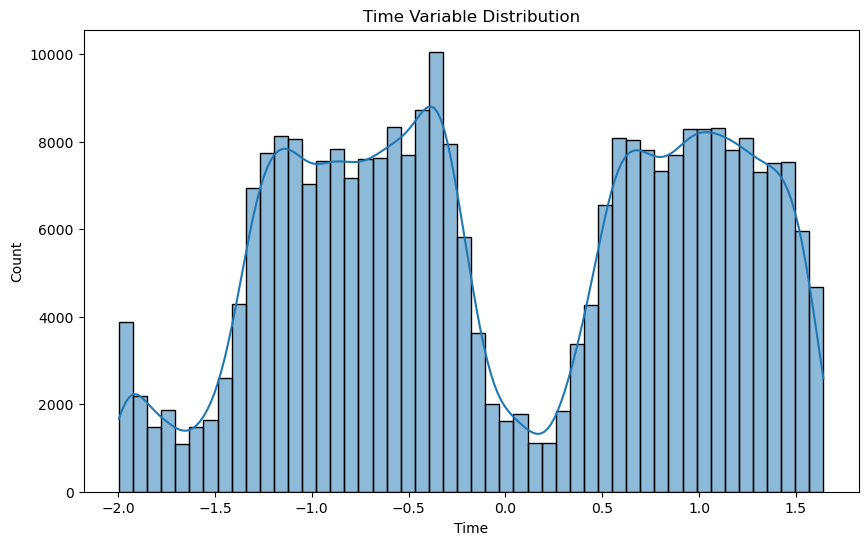

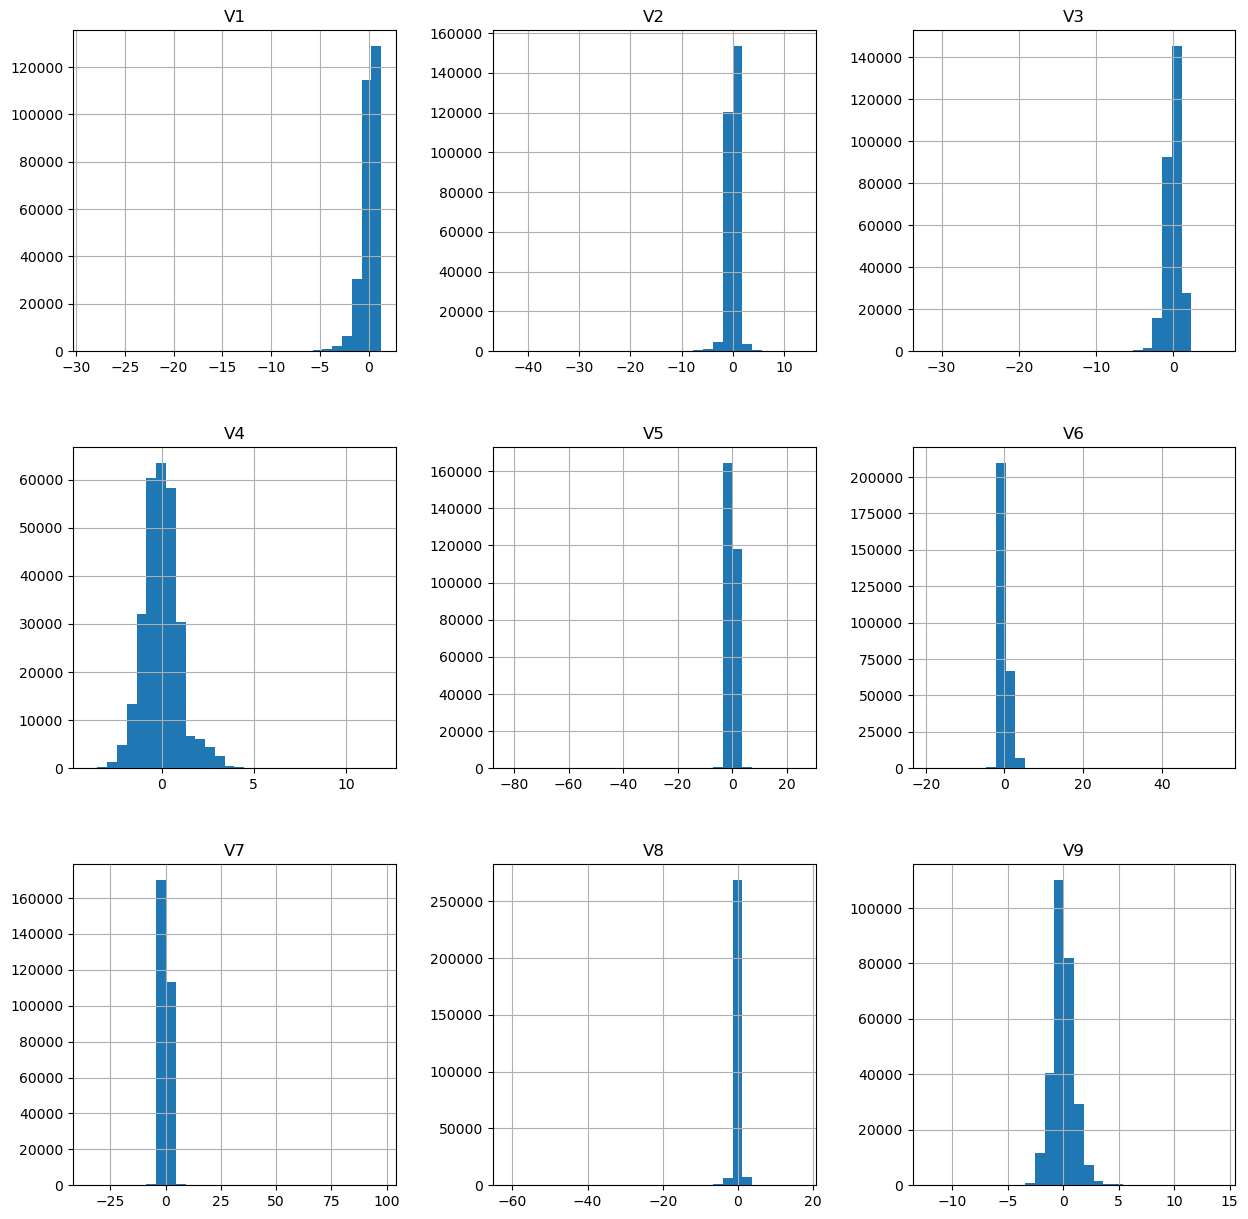

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Time variable distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_scaled['Time'], bins=50, kde=True)
plt.title('Time Variable Distribution')
plt.show()

# V1-V9 variables distribution
df_scaled[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9']].hist(figsize=(15, 15), bins=30)
plt.show()


In [5]:
print(df_scaled['Class'].value_counts())
y_train.head()

Class
-0.041599     284315
 24.039052       492
Name: count, dtype: int64


265518    0
180305    0
42664     0
198723    0
82325     0
Name: Class, dtype: int32

## 3: Model selection & Training

### Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score


# Logistic Regression
lr = LogisticRegression()

# Define a custom scorer with pos_label set to the minority class (24)
scorer = make_scorer(f1_score, pos_label=24)

# Use this scorer in your cross-validation
lr_scores = cross_val_score(lr, X_train_smote, y_train_smote, cv=5, scoring=scorer)
print('Logistic Regression F1 Score:', lr_scores.mean())

Logistic Regression F1 Score: 0.9501624299742295


In [16]:
lr.fit(X_train_smote, y_train_smote)

LogisticRegression()

### Decision Tree

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, f1_score


pos_label = 24  

# Define a custom scorer with pos_label 
scorer = make_scorer(f1_score, pos_label=pos_label)

# Example usage with Decision Tree Classifier
dt = DecisionTreeClassifier()

# Use this scorer in your cross-validation
dt_scores = cross_val_score(dt, X_train_smote, y_train_smote, cv=5, scoring=scorer)
print('Decision Tree F1 Score:', dt_scores.mean())


Decision Tree F1 Score: 0.9980540314173091


In [18]:
dt.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier()

### Random Forest

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import numpy as np

# Assuming you have X_train_smote, y_train_smote prepared and properly defined

# Define a custom scorer with pos_label set to the minority class (24)
scorer = make_scorer(f1_score, pos_label=24)

# Initialize your Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Use cross-validation to evaluate the model
rf_scores = cross_val_score(rf, X_train_smote, y_train_smote, cv=5, scoring=scorer)

print('Random Forest F1 Score:', rf_scores.mean())


Random Forest F1 Score: 0.9999032870897855


In [19]:

rf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

### Saving Models and loading

In [20]:
import joblib

# Save the Logistic Regression model
joblib.dump(lr, 'logistic_regression_model.pkl')

# Save the Decision Tree model
joblib.dump(dt, 'decision_tree_model.pkl')

# Save the Random Forest model
joblib.dump(rf, 'random_forest_model.pkl')

print("Models saved successfully!")


Models saved successfully!


In [6]:
import joblib
# Load the Logistic Regression model
lr = joblib.load('logistic_regression_model.pkl')

# Load the Decision Tree model
dt = joblib.load('decision_tree_model.pkl')

# Load the Random Forest model
rf = joblib.load('random_forest_model.pkl')

print("Models loaded successfully!")

Models loaded successfully!


## 4: Model Evaluation

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the evaluation function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=24)
    recall = recall_score(y_test, y_pred, pos_label=24)
    f1 = f1_score(y_test, y_pred, pos_label=24)
    roc_auc = roc_auc_score(y_test, y_pred)
    return accuracy, precision, recall, f1, roc_auc

# Evaluate the models
models = {'Logistic Regression': lr, 'Decision Tree': dt, 'Random Forest': rf}

for model_name, model in models.items():
    accuracy, precision, recall, f1, roc_auc = evaluate_model(model, X_test, y_test)
    print(f'{model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, ROC AUC: {roc_auc:.4f}')


Logistic Regression - Accuracy: 0.9741, Precision: 0.0579, Recall: 0.9184, F1 Score: 0.1089, ROC AUC: 0.9463
Decision Tree - Accuracy: 0.9974, Precision: 0.3737, Recall: 0.7551, F1 Score: 0.5000, ROC AUC: 0.8765
Random Forest - Accuracy: 0.9994, Precision: 0.8587, Recall: 0.8061, F1 Score: 0.8316, ROC AUC: 0.9029


## 5: Model Visualization


Evaluating Logistic Regression


c:\Users\dhana\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Confusion Matrix:
[[55399  1465]
 [    8    90]]


C:\Users\dhana\AppData\Local\Temp\ipykernel_19420\1636049073.py:25: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2)


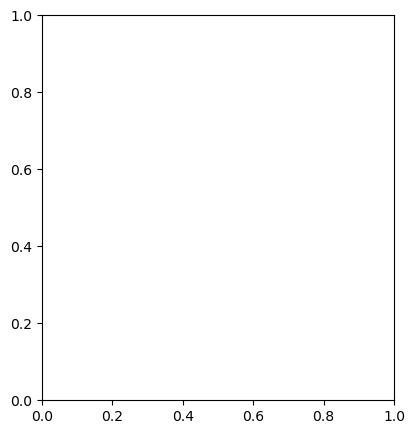

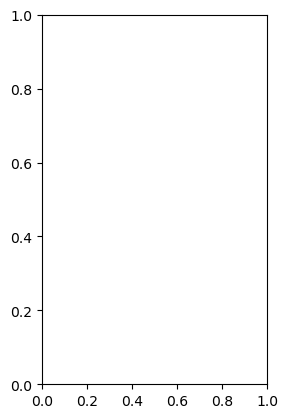

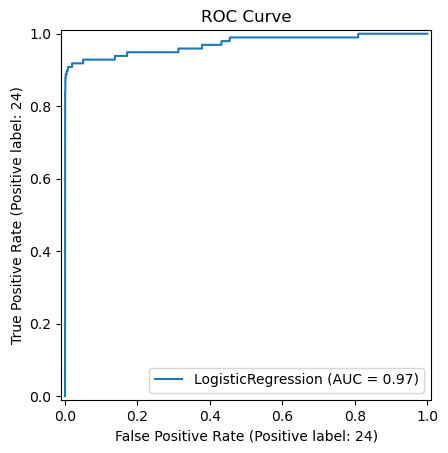

Logistic Regression - Accuracy: 0.9741, Precision: 0.0579, Recall: 0.9184, F1 Score: 0.1089, ROC AUC: 0.9463

Evaluating Decision Tree
Confusion Matrix:
[[56747   117]
 [   24    74]]


C:\Users\dhana\AppData\Local\Temp\ipykernel_19420\1636049073.py:25: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2)


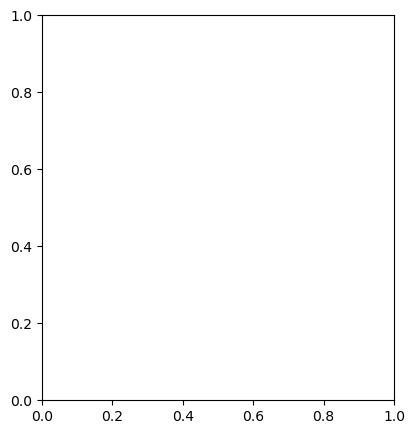

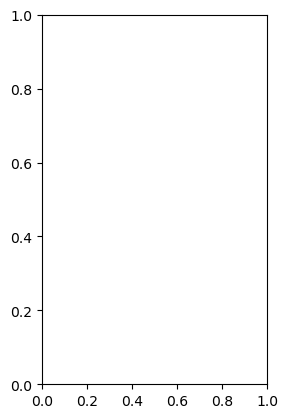

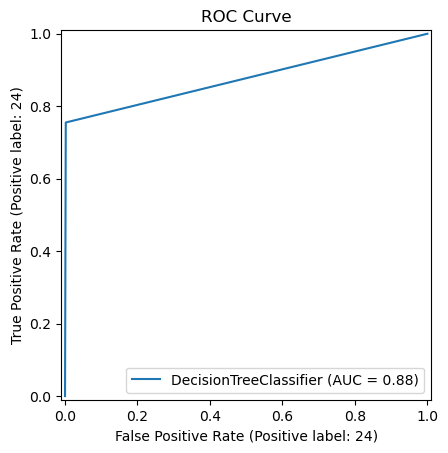

Decision Tree - Accuracy: 0.9975, Precision: 0.3874, Recall: 0.7551, F1 Score: 0.5121, ROC AUC: 0.8765

Evaluating Random Forest
Confusion Matrix:
[[56851    13]
 [   19    79]]


C:\Users\dhana\AppData\Local\Temp\ipykernel_19420\1636049073.py:25: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2)


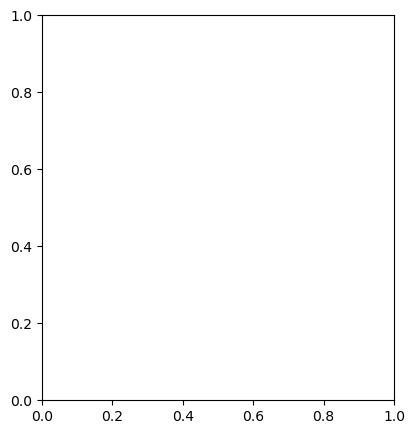

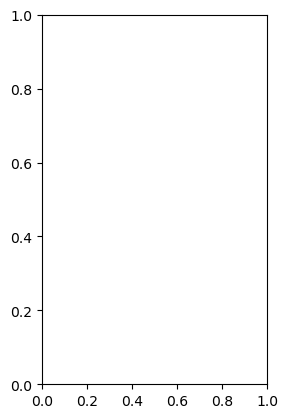

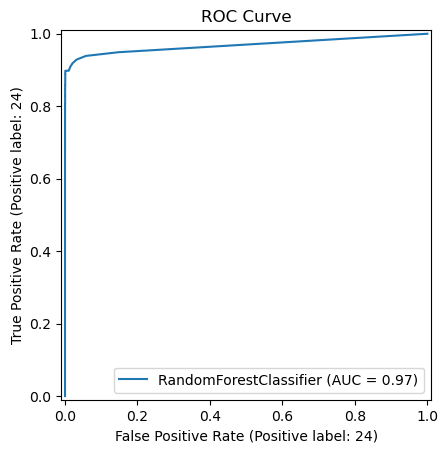

Random Forest - Accuracy: 0.9994, Precision: 0.8587, Recall: 0.8061, F1 Score: 0.8316, ROC AUC: 0.9029


In [12]:

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
import matplotlib.pyplot as plt

# Extend the evaluation function
def evaluate_model_extended(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=24)
    recall = recall_score(y_test, y_pred, pos_label=24)
    f1 = f1_score(y_test, y_pred, pos_label=24)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix:\n{conf_matrix}')
    
    # Plot Precision-Recall Curve
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    PrecisionRecallDisplay.from_estimator(model, X_test, y_test)
    plt.title('Precision-Recall Curve')
    
    # Plot ROC Curve
    plt.subplot(1, 2, 2)
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.title('ROC Curve')
    plt.show()
    
    return accuracy, precision, recall, f1, roc_auc, conf_matrix

models = {'Logistic Regression': lr, 'Decision Tree': dt, 'Random Forest': rf}

for model_name, model in models.items():
    # Ensure model is fitted before evaluation
    if hasattr(model, 'fit'):
        print(f'\nEvaluating {model_name}')
        model.fit(X_train_smote, y_train_smote)  # Train model on SMOTE data
        accuracy, precision, recall, f1, roc_auc, conf_matrix = evaluate_model_extended(model, X_test, y_test)
        print(f'{model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, ROC AUC: {roc_auc:.4f}')


In [13]:
from joblib import dump

# Assuming best_rf is your trained Random Forest model
dump(rf, 'best_rf.joblib')

['best_rf.joblib']

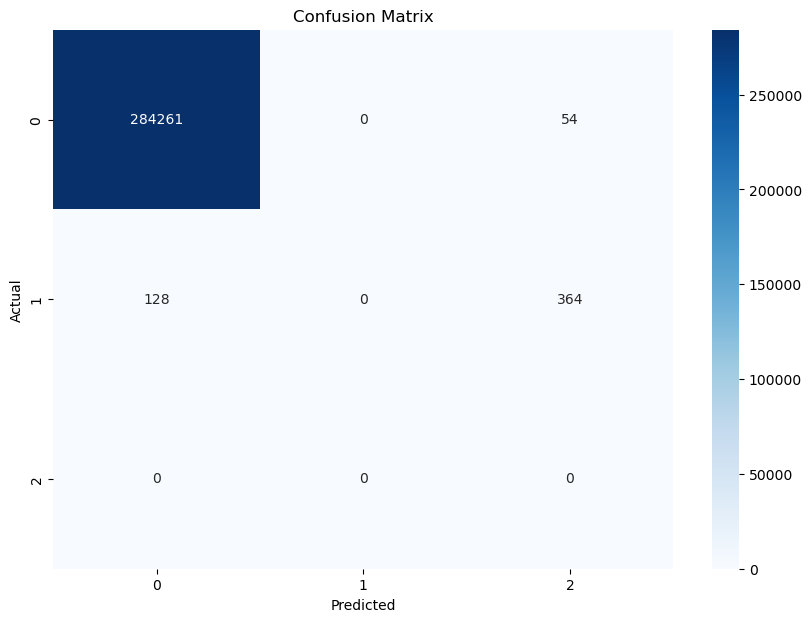

In [5]:
import joblib
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the model
model = joblib.load('best_rf.joblib')

# Assuming X_test and y_test are defined elsewhere in your notebook
# X_test, y_test = ...

X_test['Amount_log'] = np.log(X_test['Amount'] + 1)

# Now, `X_test` includes the 'Amount_log' feature, and you can proceed with prediction and plotting
y_pred = model.predict(X_test)

# Step 4: Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 5: Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()